## LOAN  PREDICTION  USING  MACHINE  LEARNING

 Banks are  making major  part of  profits through  loans. Though  lot of  people are  applying for loans.  It’s  hard  to  select  the  genuine  applicant,  who  will  repay  the  loan.  While  doing  the  process manually,  lot  of  misconception  may  happen  to  select  the  genuine  applicant. 
 

Therefore, developing  loan  prediction  system  using  machine  learning,  so  the  system  automatically  selects  the eligible candidates. This is helpful to both bank staff and applicant. The time period for the sanction of loan will be drastically reduced. In this project we are predicting the loan data by using some machine learning algorithms. 

AIM : 

The major aim of this project is to predict which of the customers will have their loan paid or not. Therefore, this is a supervised classification problem to be trained with algorithms like:
1. Logistic Regression
2. Random Forest 


In [1]:
# importing essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
#reading csv file
loan_data = pd.read_csv(r"C:\Users\disha\Desktop\Projects\loan eligibility\loan_approval_dataset.csv")

# Exploratory Data Analysis (EDA)

In [5]:
# printing first five rows of dataset
loan_data.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
# Printing last five rows of datset
loan_data.tail(6)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4263,4264,3,Graduate,No,5000000,12700000,14,865,4700000,8100000,19500000,6300000,Approved
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [7]:
# Obtaining the dimensions of dataset
loan_data.shape

(4269, 13)

In [8]:
# Gives decription of the dataset
loan_data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
# Statistical summary of dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [10]:
# Check null values
loan_data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [11]:
                    # Dealing with Categorical values
    

loan_data[' self_employed'] =  loan_data[' self_employed'].map({' No':0,' Yes':1})

loan_data[' education'] =loan_data[' education'].map({' Not Graduate':0,' Graduate':1})
# Loan_Status column
loan_data[' loan_status'] =loan_data[' loan_status'].map({' Rejected':0,' Approved':1})

In [12]:
loan_data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [13]:
X = loan_data[[' self_employed', ' income_annum', ' loan_amount', ' cibil_score',' education',' loan_term',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value']]
y = loan_data[' loan_status']

## Check output distribution

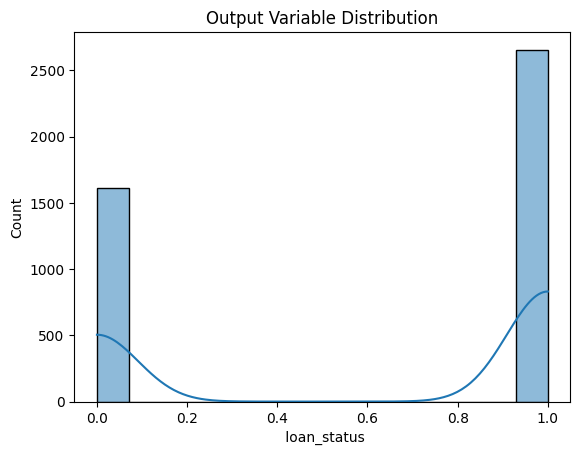

In [18]:
output_variable = ' loan_status'  
if loan_data[output_variable].dtype == 'object':  # Categorical output
    print(loan_data[output_variable].value_counts())
    sns.countplot(loan_data[output_variable])
else:  # Continuous output
    sns.histplot(loan_data[output_variable], kde=True)

plt.title('Output Variable Distribution')
plt.show()

## Correlation Matrix

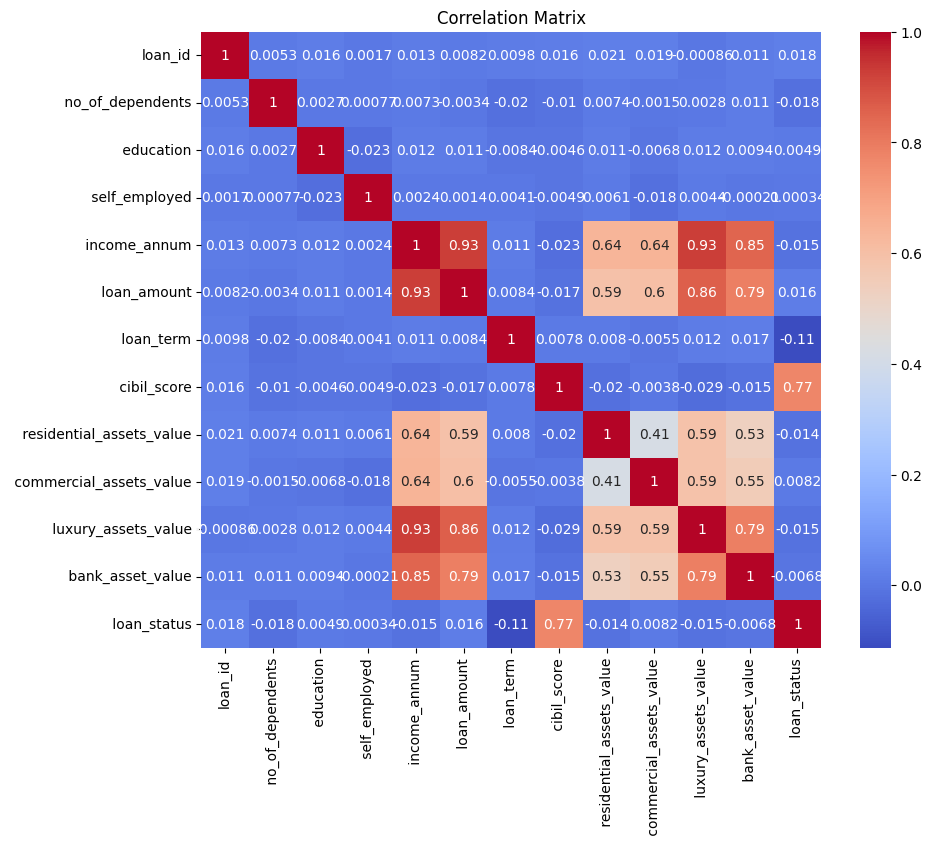

In [19]:
# Correlation for numerical variables
correlation_matrix = loan_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Model Building and Prediction

In [20]:
# Data Splitting
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.2,
random_state = 42)

**Random forest algorithm**

In [21]:
# Function to split dataset into left and right based on a feature and a threshold
def split_data(X, y, feature_index, threshold):
    left_indices = [i for i in range(len(X)) if X[i][feature_index] <= threshold]
    right_indices = [i for i in range(len(X)) if X[i][feature_index] > threshold]
    return left_indices, right_indices

# Function to calculate Gini Impurity
def gini_impurity(y):
    class_counts = Counter(y)
    n_samples = len(y)
    impurity = 1 - sum((count / n_samples) ** 2 for count in class_counts.values())
    return impurity

# Function to calculate information gain
def information_gain(y, left_indices, right_indices):
    n_samples = len(y)
    left_impurity = gini_impurity([y[i] for i in left_indices])
    right_impurity = gini_impurity([y[i] for i in right_indices])
    weighted_impurity = (len(left_indices) / n_samples) * left_impurity + (len(right_indices) / n_samples) * right_impurity
    return gini_impurity(y) - weighted_impurity

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        # Stop if max depth is reached or data is pure
        if len(set(y)) == 1 or (self.max_depth and depth >= self.max_depth):
            return Counter(y).most_common(1)[0][0]

        # Find the best split
        best_feature, best_threshold, best_gain, best_split = None, None, -1, None
        for feature_index in range(len(X[0])):
            thresholds = set([row[feature_index] for row in X])
            for threshold in thresholds:
                left_indices, right_indices = split_data(X, y, feature_index, threshold)
                if left_indices and right_indices:
                    gain = information_gain(y, left_indices, right_indices)
                    if gain > best_gain:
                        best_feature, best_threshold, best_gain, best_split = feature_index, threshold, gain, (left_indices, right_indices)

        # Stop if no gain
        if best_gain == -1:
            return Counter(y).most_common(1)[0][0]

        # Split recursively
        left_indices, right_indices = best_split
        left_subtree = self._grow_tree([X[i] for i in left_indices], [y[i] for i in left_indices], depth + 1)
        right_subtree = self._grow_tree([X[i] for i in right_indices], [y[i] for i in right_indices], depth + 1)
        return (best_feature, best_threshold, left_subtree, right_subtree)

    def predict_one(self, row, node):
        if not isinstance(node, tuple):  # If leaf node
            return node
        feature, threshold, left_subtree, right_subtree = node
        if row[feature] <= threshold:
            return self.predict_one(row, left_subtree)
        else:
            return self.predict_one(row, right_subtree)

    def predict(self, X):
        return [self.predict_one(row, self.tree) for row in X]
class RandomForest:
    def __init__(self, n_estimators=10, max_depth=None, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        n_samples = len(X)
        for _ in range(self.n_estimators):
            # Bootstrap sampling
            indices = sample(range(n_samples), n_samples)
            X_bootstrap = [X[i] for i in indices]
            y_bootstrap = [y[i] for i in indices]

            # Create a decision tree
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        # Aggregate predictions from all trees
        tree_predictions = [tree.predict(X) for tree in self.trees]
        aggregated_predictions = []
        for i in range(len(X)):
            predictions = [tree_predictions[tree_idx][i] for tree_idx in range(self.n_estimators)]
            aggregated_predictions.append(Counter(predictions).most_common(1)[0][0])
        return aggregated_predictions


RandomForestClassifier(max_depth=4, random_state=10)

In [23]:
from sklearn.metrics import accuracy_score
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.9660421545667447

In [24]:
pred_train = model.predict(x_train)
print("Accuracy: ",accuracy_score(y_train,pred_train))

Accuracy:  0.9730600292825768


In [25]:
import pickle
# Save the trained model to a pickle file
file_name = "model1.pkl"
with open(file_name, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {file_name}")

Model saved to model1.pkl


**Logistic Regression**

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [31]:
from sklearn.metrics import accuracy_score
y_pred= model.predict(x_train) 
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7317715959004393


In [32]:
import pickle
# Save the trained model to a pickle file
file_name = "modelLogisticRegression.pkl.pkl"
with open(file_name, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {file_name}")

Model saved to modelL.pkl
